### Taustatietoja opettajalle

Tämä notebook sisältää esimerkkitehtävän, jossa tutkitaan datan määrän vaikutusta datasta muodostettavaan histogrammiin.

GitHubissa tai nbviewerissä avattaessa esimerkki on staattisessa muodossa, jolloin tarkastelu onnistuu myös ilman Jupyter Notebookin asennusta. Esimerkin voi myös ladata linkistä https://github.com/prikkila/hiukkasfysiikan-esimerkki painikkeella "Clone or download". Pakattu kansio sisältää myös datatiedoston ja kuvat, joita esimerkissä käytetään. Latauksen jälkeen esimerkin voi avata Jupyterissa, jolloin esimerkki toimii tarkoitetulla tavalla, interaktiivisesti.

Opetuskäytössä tehtävä toteutetaan edellä mainitulla interaktiivisella tavalla Jupyterin avulla, jolloin oppilaat pääsevät muokkaamaan koodia, ja tarkastelemaan muokkauksen aiheuttamia muutoksia. Lisäksi Jupterilla lopussa oleva kuvasarja voitaisiin toteuttaa animaationa.

Esimerkkitehtävä sisältää aluksi lyhyen teoriapaketin, ja tämän jälkeen käytännön osuuden.

# Esimerkkitehtävä: Invariantin massan histogrammi

Tässä tehtävässä tutustutaan CMS-hiukkasilmaisimeen ja invariantin massan käsitteeseen. CMS-ilmaisimella kerätyn oikean datan avulla selvitetään, miten kerätyn datan määrä vaikuttaa siitä muodostettuun histogrammiin.

### CMS-ilmaisin

CERNissä LHC-hiukkaskiihdyttimellä kiihdytetään hiukkassuihkuja ja törmäytetään niitä toisiinsa. CMS-ilmaisimella voidaan havaita ja mitata näissä törmäyksissä syntyneitä hiukkasia. Alla olevassa kuvassa on CMS-ilmaisin avattuna.

<img src="CMS_avattu.jpg" alt="CMS-ilmaisin avattuna" style="height: 400px">

(Kuva: Domenico Salvagnin, https://commons.wikimedia.org/wiki/File:CMS@CERN.jpg)
<br>
<br>
<br>

### Invariantti massa

Yksi arvo, joka CMS-ilmaisimen mittaustuloksista pystytään laskemaan, on invariantti massa $M$. Invariantti massa on matemaattinen käsite, ei siis fysikaalinen massa. Otetaan esimerkiksi tilanne, jossa hiukkanen A hajoaa kahdeksi hiukkaseksi B ja C. Näiden kahden hiukkasen B ja C invariantti massa määritellään lausekkeella

$$ M = \sqrt{(E_1 + E_2)^2-(\vec{p_1} + \vec{p_2})^2}, $$

jossa $E_1$ ja $E_2$ ovat hajoamisessa syntyneiden hiukkasten energiat, sekä $\vec{p_1}$ ja $\vec{p_2}$ niiden liikemäärävektorit.

Invarianttia massaa voidaan hyödyntää esimerkiksi hiukkasen A massan selvittämisessä, sillä hiukkasten B ja C invariantti massa on yhtäsuuri hiukkasen A fysikaalisen massan kanssa. Eli selvittämällä hiukkasten B ja C liikemäärät ja energiat, voidaan niille laskea invariantti massa, ja edelleen tästä päätellä hiukkasen A massa. Tässä tehtävässä käytämme valmiiksi laskettuja invariantin massan arvoja.

### Lähdetään kokeilemaan!

Lähdetään tarkastelemaan oikeaa CMS-ilmaisimen keräämää dataa. Käytetään CMS:n vuodelta 2011 kerättyä dataa, josta on valittu 10851 törmäystapahtumaa (events) tiedostoon "Zmumu_Run2011A.csv". (Karsinta on suoritettu koodilla, joka on avoimesti saatavilla osoitteessa https://github.com/tpmccauley/dimuon-filter.)

Tiedosto sisältää valmiiksi lasketun invariantin massan $M$ jokaiselle 10851 tapahtumalle. Koska jokainen törmäystapahtuma on hieman erilainen, tulee eri tapahtumista erisuuruisia arvoja $M$:lle. Arvojen tarkasteluun on kätevä käyttää histogrammia. Histogrammi kuvaa, kuinka monta $M$:n arvoa on osunut tietyille arvoväleille.

Seuraavassa tehtävässä on tarkoituksena tutkia, __miten käytetyn datan määrä vaikuttaa datasta piirrettyyn histogrammiin__.

### 1) Tilanteen alustus

Aloitetaan koodilla, joka alustaa tarvittavat muuttujat ja moduulit histogrammin piirtämistä varten. Tutustu koodin seassa oleviin kommentteihin, ja aja koodi klikkaamalla ensin solu aktiiviseksi, ja sen jälkeen painamalla näppäinyhdistelmää Ctrl + Enter. Tämän jälkeen voit siirtyä vaiheeseen kaksi.

In [1]:
# Haetaan tarvittavat moduulit. Pandas on data-analyysiä varten, numpy tieteellistä laskentaa ja
# matplotlib.pyplot mahdollistaa kuvaajien piirtämisen. Annetaan näille lyhyemmät nimet (pd, np ja plt),
# jotta myöhemmin niitä käytettäessä ei tarvitse kirjoittaa koko moduulin nimeä.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Luodaan uusi DataFrame-rakenne CMS:n mittausdataa sisältävästä tiedostosta "Zmumu_Run2011A.csv".
# Nimetään luotu DataFrame "datasetiksi".
datasetti = pd.read_csv('Zmumu_Run2011A.csv')

# Luodaan Series-rakenne (joka on periaatteessa yksiulotteinen taulukko) ja annetaan sille nimi "invariantti_massa".
# Annetaan tälle arvot "datasetti"-DataFramen sarakkeelta "M".
invariantti_massa = datasetti['M']

# Luodaan tyhjä taulukko "valitut", johon tullaan tallentamaan valittu määrä invariantin massan arvoja.
valitut = []

### 2) Datan määrän valitseminen

Voit valita käytettävän datan määrän muuttamalla alla olevan koodisolun muuttujan _datamaara_ arvoa. Muutoksen jälkeen voit ajaa koodia aina uudestaan näppäinyhdistelmällä Ctrl + Enter.

Tutki, miten käytetyn datan määrä vaikuttaa histogrammiin. Mitä arvoa invariantin massan eri tulokset näyttäisivät lähestyvän? Mitä voit päätellä tästä arvosta?

Ennusta koodiin tutustumalla, mitä tapahtuu, jos annat datan määräksi suuremman arvon kuin 10851? Kokeile, osuiko ennustuksesi oikeaan!


 Valitsit koko datasta 5400 arvoa invariantille massalle.


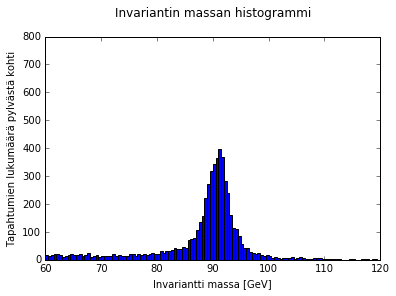

In [8]:
datamaara = 5400 # <----- Vaihtele tätä arvoa ja aja koodia uudestaan

# Luodaan if-silmukka, joka tulostaa virheilmoituksen jos datan määräksi asetetaan suurempi luku kuin dataa
# on saatavilla. Muussa tapauksessa silmukka lisää tyhjään taulukkoon "valitut" niin monta invariantin massan
# arvoa taulukosta "invariantti_massa" kuin muuttujaan "datamäärä" on asetettu.
if datamaara > 10851:
    print('''Datan määrä valittu suuremmaksi kuin mitä dataa on saatavilla, joten histogrammia ei voitu piirtää!
Maksimiarvo datan määrälle on 10851.''')
else:    
    for f in range(datamaara):
        M = invariantti_massa[f]
        valitut.append(M)
    print('\n Valitsit koko datasta {} arvoa invariantille massalle.'.format(datamaara))

# Käytetään numpy-paketin historgam-funktiota, ja luodaan histogrammi valituista invarianteista massoista.
# Nimetään histogrammi "histogrammi1":ksi.
histogrammi1 = np.histogram(valitut, bins=120, range=(60,120))

# Jupyter Notebookissa on valmiiksi määritettyjä "magic function" -komentoja. Tämän avulla histogrammi saadaan näkymään
# suoraan notebookissa.
%matplotlib inline

# Valmistellaan histogrammin piirtoa matplotlib.pyplot-moduulia varten. Määritetään histogrammin palkkien leveys sekä
# histogrammin keskikohta.
hist1, bins1 = histogrammi1
width1 = 1.0*(bins1[1] - bins1[0])
center1 = (bins1[:-1] + bins1[1:])/2

# Plotataan histogrammi matplotlib.pyplotin avulla. Nimetään x- ja y-akselit.
plt.bar(center1, hist1, align='center', width=width1)
plt.xlabel('Invariantti massa [GeV]')
plt.ylabel('Tapahtumien lukumäärä pylvästä kohti')
plt.title('Invariantin massan histogrammi\n')

# Asetetaan y-akseli välille 0-800.
axes = plt.gca()
axes.set_ylim([0,800])

# Piirretään histogrammi ja nollataan valitut arvot uutta valintaa varten.
plt.show()
valitut = []

### 3) Histogrammin kehitys datapisteiden määrän kasvaessa

Tarkastellaan vielä kuvasarjan avulla histogrammin muuttumista datamäärän kasvaessa.

Alla oleva koodi luo samasta datasta 11 invariantin massan histogrammia eri datamäärille. Jokaisen kuvaajan välissä mukaan otetaan 1000 invariantin massan arvoa lisää. Tarkastele kuvasarjaa ja kuvaile havaintojasi.
<br>
<br>
<br>

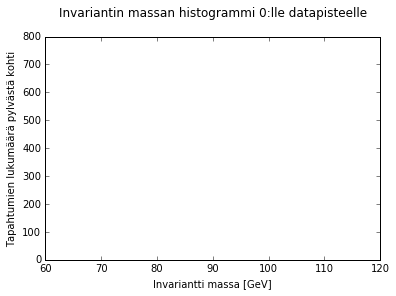

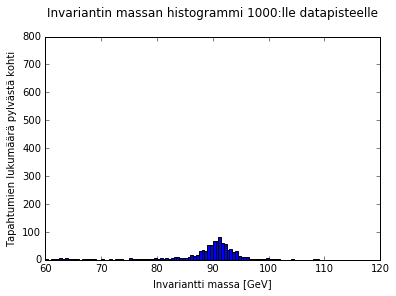

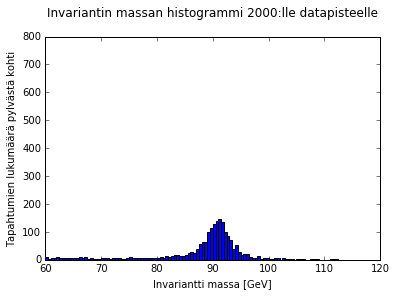

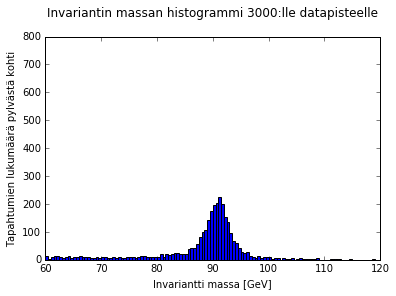

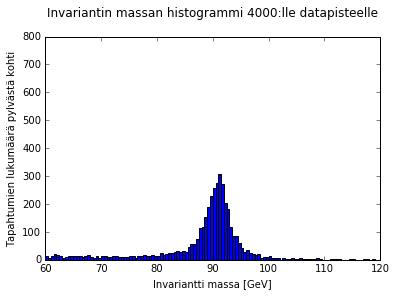

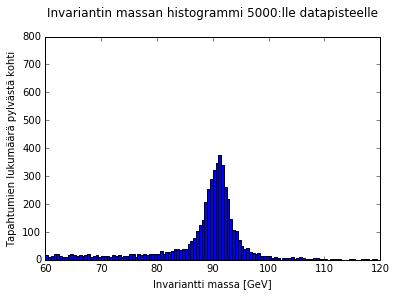

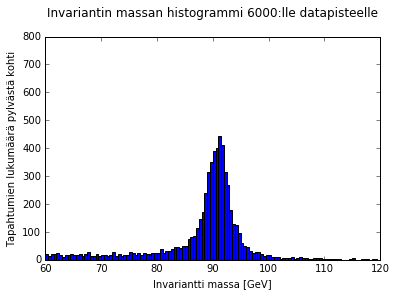

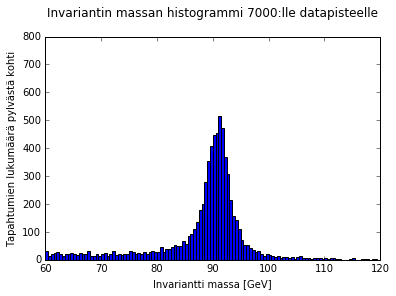

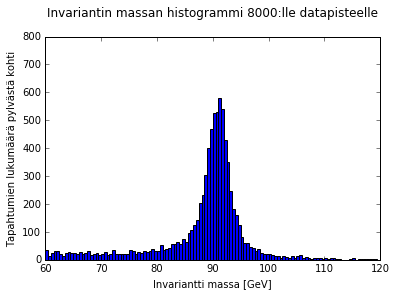

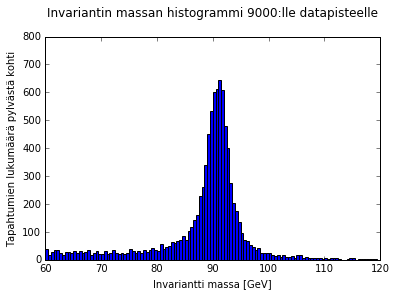

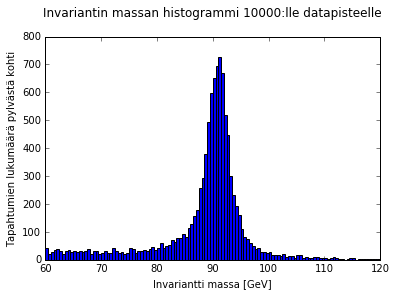

In [6]:
#massa = invariantti_massa[0:10]
for a in range(0,10851,1000):
    T = invariantti_massa[0:a]
    histogrammi2 = np.histogram(T, bins=120, range=(60,120))
    
    %matplotlib inline

    hist2, bins2 = histogrammi2
    width2 = 1.0*(bins2[1] - bins2[0])
    center2 = (bins2[:-1] + bins2[1:])/2
    
    plt.bar(center2, hist2, align='center', width=width2)
    plt.xlabel('Invariantti massa [GeV]')
    plt.ylabel('Tapahtumien lukumäärä pylvästä kohti')
    plt.title('Invariantin massan histogrammi {}:lle datapisteelle\n'.format(len(T)))

    axes = plt.gca()
    axes.set_ylim([0,800])

    plt.show()